# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# setting path and importing data to a pandas dataframe
PATH = "stage_1_train_labels.csv"
df = pd.read_csv(PATH)

#### Converting [y, x, width, height] into [x1, x2, y1, y2]
The default parameters for bounding boxes are 'x', 'y', 'width', and 'height'. The required parameters for the network 
#### EDIT THIS
are 'x1', 'x2', 'y1', 'y2' where 'x1' and 'y1' are minimums and 'x2' and 'y2' are maximums. The original 'x' and 'y' are the min x and y (x1 and y1) coordinates of the bounding box. We can then add the width and height respectively to these values to obtain x2 and y2.

In [3]:
# changing column labels and adjusting values
# x1 = x, x2 = width + x, y1 = y, y2 = y + height
df["x1"],df["x2"],df["y1"],df["y2"] = df["x"],df["width"]+df["x"],df["y"],df["y"]+df["height"]
df=df.drop(columns=["x","y","height","width"])

# moving column "Target" back to final index
# this implementation is incredibly lazy and can likely be improved on
temp = df["Target"]
df.drop(columns=["Target"],inplace=True)
df["Target"]=temp

In [4]:
# splitting dataset between benign and malignant cases
df_no_pneumonia = df.loc[df["Target"]==0]
df_yes_pneumonia = df.loc[df["Target"]==1]

# confirming data splits as expected
print(df_yes_pneumonia.head())
print(df_no_pneumonia.head())

                               patientId     x1     x2     y1     y2  Target
4   00436515-870c-4b36-a041-de91049b9ab4  264.0  477.0  152.0  531.0       1
5   00436515-870c-4b36-a041-de91049b9ab4  562.0  818.0  152.0  605.0       1
8   00704310-78a8-4b38-8475-49f4573b2dbb  323.0  483.0  577.0  681.0       1
9   00704310-78a8-4b38-8475-49f4573b2dbb  695.0  857.0  575.0  712.0       1
14  00aecb01-a116-45a2-956c-08d2fa55433f  288.0  382.0  322.0  457.0       1
                              patientId  x1  x2  y1  y2  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6 NaN NaN NaN NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd NaN NaN NaN NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb NaN NaN NaN NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5 NaN NaN NaN NaN       0
6  00569f44-917d-4c86-a842-81832af98c30 NaN NaN NaN NaN       0


#### Drawing Bounding Boxes

In [34]:
def draw_box_on_random(dir="./"):
    n = random.randint(0,df_yes_pneumonia['patientId'].count()-1)
    img_path = dir+df_yes_pneumonia['patientId'].iloc[n-1]+'.jpg'
    img = cv2.imread(img_path)
    x1 = (df_yes_pneumonia['x1'].iloc[n-1])
    y1 = (df_yes_pneumonia['y1'].iloc[n-1])
    x2 = (df_yes_pneumonia['x2'].iloc[n-1])
    y2 = (df_yes_pneumonia['y2'].iloc[n-1])
    print("x1 {0}. x2 {1}. y1 {2}. y2 {3}".format(x1,x2,y1,y2))
    img = cv2.rectangle(img,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),10)
    return img

x1 549.0. x2 789.0. y1 287.0. y2 568.0


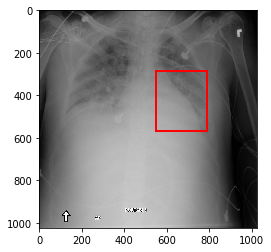

In [69]:
img,n = (draw_box_on_random(dir="../gci_data/train_images/"))
plt.imshow(img, interpolation='nearest')
plt.show()